In [1]:
##import packages
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import os
import sys


**Import the customer churn data set.  This data is from kaggle:  https://www.kaggle.com/datasets/blastchar/telco-customer-churn/data**

In [2]:
churn_df = pd.read_csv('../data_files/raw/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
churn_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
#Total Charges currently has a non-numeric data type.  It should be converted to float.
churn_df.TotalCharges = pd.to_numeric(churn_df.TotalCharges, errors='coerce')
#confirm new dtype for TotalCharges
print(churn_df.TotalCharges.dtype)


float64


In [6]:
#data appears to be complete, but will double check that there are no missing values
missing = churn_df.isnull().sum()  #count missing values
missing

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [7]:
#filter to see missing data for Total Charges column
churn_df[churn_df['TotalCharges'].isnull()==True]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [8]:
# Since it represents a very small value of the data set, I will drop the rows with nulls.
churn_df = churn_df[churn_df['TotalCharges'].isnull()==False]

#confirm that dataset now reflects the correct number of records after dropping the 11 records with TotalCharges = NaN
churn_df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [9]:
churn_df.shape

(7032, 21)

In [10]:
#review the categorical columns to determine the number of unique values for each. The service offerings for example should only have 2 values yes or no.
churn_df[['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV' , 'StreamingMovies',
                'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']].nunique()

gender              2
SeniorCitizen       2
Partner             2
Dependents          2
PhoneService        2
MultipleLines       3
InternetService     3
OnlineSecurity      3
OnlineBackup        3
DeviceProtection    3
TechSupport         3
StreamingTV         3
StreamingMovies     3
Contract            3
PaperlessBilling    2
PaymentMethod       4
Churn               2
dtype: int64

**Several of the service offerings (multiple lines, online security, device protection, etc) have more than 2 values.  Yes and No were the expected values.  More digging is needed to see what the values are.**

In [11]:
pd.unique(churn_df['MultipleLines'])

array(['No phone service', 'No', 'Yes'], dtype=object)

In [12]:
pd.unique(churn_df['InternetService'])

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [13]:
pd.unique(churn_df['OnlineSecurity'])

array(['No', 'Yes', 'No internet service'], dtype=object)

In [14]:
pd.unique(churn_df['OnlineBackup'])

array(['Yes', 'No', 'No internet service'], dtype=object)

In [15]:
pd.unique(churn_df['DeviceProtection'])

array(['No', 'Yes', 'No internet service'], dtype=object)

In [16]:
pd.unique(churn_df['StreamingTV'])

array(['No', 'Yes', 'No internet service'], dtype=object)

In [17]:
pd.unique(churn_df['StreamingMovies'])

array(['No', 'Yes', 'No internet service'], dtype=object)

In [18]:
pd.unique(churn_df['Contract'])

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [19]:
pd.unique(churn_df['PaymentMethod'])

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [20]:
pd.unique(churn_df['gender'])

array(['Female', 'Male'], dtype=object)

In [21]:
pd.unique(churn_df['SeniorCitizen'])

array([0, 1], dtype=int64)

In [22]:
pd.unique(churn_df['Partner'])

array(['Yes', 'No'], dtype=object)

In [23]:
pd.unique(churn_df['Dependents'])

array(['No', 'Yes'], dtype=object)

In [24]:
pd.unique(churn_df['PhoneService'])

array(['No', 'Yes'], dtype=object)

In [25]:
pd.unique(churn_df['PaperlessBilling'])

array(['Yes', 'No'], dtype=object)

In [26]:
# comparing the average monthly charge for each customer type and whether they churned or not
print(pd.pivot_table(churn_df, index='Churn', columns = 'PhoneService', values = 'MonthlyCharges', aggfunc='mean'))
print()
print(pd.pivot_table(churn_df, index='Churn', columns = 'PhoneService', values = 'MonthlyCharges', aggfunc='count'))
print()
print(pd.pivot_table(churn_df, index='Churn', columns = 'InternetService', values = 'MonthlyCharges', aggfunc='mean'))
print()
print(pd.pivot_table(churn_df, index='Churn', columns = 'InternetService', values = 'MonthlyCharges', aggfunc='count'))
print()
print(pd.pivot_table(churn_df, index='Churn', columns = 'gender', values = 'MonthlyCharges', aggfunc='mean'))
print()
print(pd.pivot_table(churn_df, index='Churn', columns = 'gender', values = 'MonthlyCharges', aggfunc='count'))
print()
print(pd.pivot_table(churn_df, index='Churn', columns = 'SeniorCitizen', values = 'MonthlyCharges', aggfunc='mean'))
print()
print(pd.pivot_table(churn_df, index='Churn', columns = 'SeniorCitizen', values = 'MonthlyCharges', aggfunc='count'))



PhoneService         No        Yes
Churn                             
No            43.478725  63.261552
Yes           37.533824  78.134255

PhoneService   No   Yes
Churn                  
No            510  4653
Yes           170  1699

InternetService        DSL  Fiber optic         No
Churn                                             
No               60.200026    93.932379  21.133156
Yes              49.083224    88.126484  20.368142

InternetService   DSL  Fiber optic    No
Churn                                   
No               1957         1799  1407
Yes               459         1297   113

gender     Female       Male
Churn                       
No      61.674941  60.950401
Yes     74.812087  74.066989

gender  Female  Male
Churn               
No        2544  2619
Yes        939   930

SeniorCitizen          0          1
Churn                              
No             58.660196  79.182057
Yes            72.298098  80.713445

SeniorCitizen     0    1
Churn               

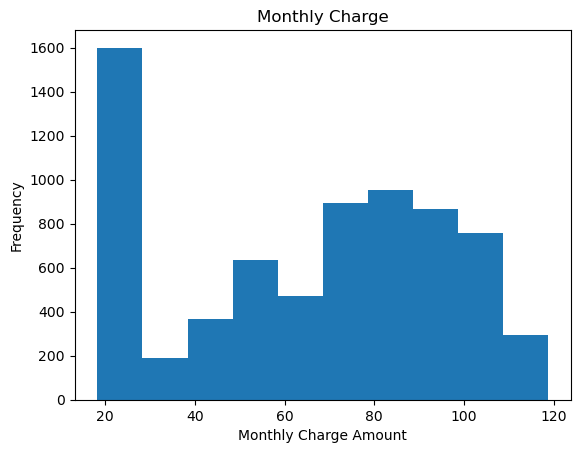

In [27]:
# take a look at the distribution for the monthly charges for dataset as a whole
plt.hist(churn_df['MonthlyCharges'])
plt.title('Monthly Charge')
plt.xlabel('Monthly Charge Amount')
plt.ylabel('Frequency')
plt.show()

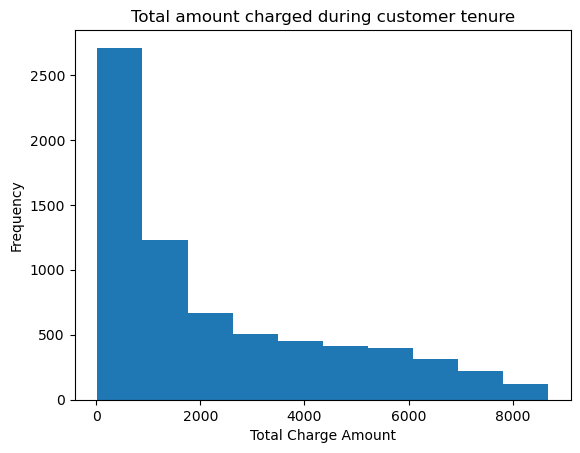

In [28]:
# take a look at the distribution for the total charges for dataset as a whole
plt.hist(churn_df['TotalCharges'])
plt.title('Total amount charged during customer tenure')
plt.xlabel('Total Charge Amount')
plt.ylabel('Frequency')
plt.show()

# Initial thoughts of dataset
Gender doesn't appear to play any part in whether a customer churns or not.  When looking at Phone services, it would appear that the customers who churned had an average monthly charge of $78 vs $63 for those who didn't.  As it relates to internet service, those on Fiber Optic are paying the most each month with an avg monthly charge of $88.13 as well as the most likely to churn.  We will also dig deeper into the various streaming services during the data exploration, to see if they follow suit or contribute to the high churn rate within internet service.

There appear to be two major service categories.  They are Phone service and Internet Service.  Then within those services, there are subcategories of services.  For example for Phone, the subcategory is Multiple lines.  

For Internet the subcategory services are StreamingTV, StreamingMovies, OnlineBackup, OnlineSecurity and DeviceProtection.  These columns will need to be converted to numeric data prior to training ml models.

An additional column should be added to the dataset to count the number of services each customer is enrolled.  As that could potentially be related to churn.
The first step will be to convert the categorical fields into numeric in order to perform counts.

In [29]:
# first step is to convert churn to numeric field where No=0 and Yes=1
# create dictionary for mapping categorical fields with non-numeric data containing yes and no values.  
categorical_dictionary = {"No": 0, "No internet service":0, "No phone service":0,"Yes":1}
# create new dictionary for gender
gender_dictionary = {"Male": 1, "Female":0}
# create new dictionary for contract type
contract_dictionary = {"Month-to-month": 0, "One year":1, "Two year":2}
# create new dictionary for payment method
pay_method_dictionary = {"Electronic check": 0, "Mailed check":1, "Bank transfer (automatic)":2, "Credit card (automatic)":3}
#create new dictionary for internet service types
internet_service_dictionary = {"No":0, "DSL":1, "Fiber optic":2}

In [30]:
#use the new categorical dictionary to add numeric fields for the following columns: 
#'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV' , 'StreamingMovies','PaperlessBilling' and 'Churn'
churn_df['Churn_num']=churn_df['Churn'].map(categorical_dictionary)
churn_df['Partner_num']=churn_df['Partner'].map(categorical_dictionary)
churn_df['Dependents_num']=churn_df['Dependents'].map(categorical_dictionary)
churn_df['PhoneService_num']=churn_df['PhoneService'].map(categorical_dictionary)
churn_df['MultipleLines_num']=churn_df['MultipleLines'].map(categorical_dictionary)
churn_df['OnlineSecurity_num']=churn_df['OnlineSecurity'].map(categorical_dictionary)
churn_df['OnlineBackup_num']=churn_df['OnlineBackup'].map(categorical_dictionary)
churn_df['DeviceProtection_num']=churn_df['DeviceProtection'].map(categorical_dictionary)
churn_df['TechSupport_num']=churn_df['TechSupport'].map(categorical_dictionary)
churn_df['StreamingTV_num']=churn_df['StreamingTV'].map(categorical_dictionary)
churn_df['StreamingMovies_num']=churn_df['StreamingMovies'].map(categorical_dictionary)
churn_df['PaperlessBilling_num']=churn_df['PaperlessBilling'].map(categorical_dictionary)

#add numeric column for types of internet service column
churn_df['InternetService_num']=churn_df['InternetService'].map(internet_service_dictionary)
#add numeric column for gender column
churn_df['gender_num']=churn_df['gender'].map(gender_dictionary)
#add numeric column for churn contract type column
churn_df['Contract_num']=churn_df['Contract'].map(contract_dictionary)
#add numeric column for payment method column
churn_df['PaymentMethod_num']=churn_df['PaymentMethod'].map(pay_method_dictionary)

In [31]:
# additional data points that may provide insights include a column indicating if the customer has both phone and internet service
# add a new column indicating Phone_Internet by adding the column values together.  Where 1 = yes and 0 = no
churn_df["Phone_Internet"] = churn_df['PhoneService_num']+churn_df["InternetService_num"].median() - 1
#another datapoint that may be relevant is the total number of services the custmer subscribes to. We will add a new column with the total # of services
service_columns = ['PhoneService_num', 'MultipleLines_num', 'OnlineSecurity_num', 'OnlineBackup_num', 'DeviceProtection_num', 'TechSupport_num', 'StreamingTV_num', 'StreamingMovies_num','InternetService_num']
churn_df["Number_of_Services"] = churn_df[service_columns].sum(axis=1)

In [32]:
churn_df.shape

(7032, 39)

In [33]:
churn_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport_num,StreamingTV_num,StreamingMovies_num,PaperlessBilling_num,InternetService_num,gender_num,Contract_num,PaymentMethod_num,Phone_Internet,Number_of_Services
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,0,0,0,1,1,0,0,0,0.0,2
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,0,0,0,0,1,1,1,1,1.0,4
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,0,0,0,1,1,1,0,1,1.0,4
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,1,0,0,0,1,1,1,2,0.0,4
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,0,0,0,1,2,0,0,0,1.0,3


In [34]:
churn_df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn_num,Partner_num,Dependents_num,PhoneService_num,MultipleLines_num,OnlineSecurity_num,...,TechSupport_num,StreamingTV_num,StreamingMovies_num,PaperlessBilling_num,InternetService_num,gender_num,Contract_num,PaymentMethod_num,Phone_Internet,Number_of_Services
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,...,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441,0.265785,0.482509,0.298493,0.903299,0.421928,0.286547,...,0.290102,0.384386,0.388367,0.592719,1.224118,0.504693,0.688567,1.315557,0.903299,4.587457
std,0.368844,24.545260,30.085974,2266.771362,0.441782,0.499729,0.457629,0.295571,0.493902,0.452180,...,0.453842,0.486484,0.487414,0.491363,0.778643,0.500014,0.832934,1.149523,0.295571,2.549976
min,0.000000,1.000000,18.250000,18.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,9.000000,35.587500,401.450000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.000000
50%,0.000000,29.000000,70.350000,1397.475000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,5.000000
75%,0.000000,55.000000,89.862500,3794.737500,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,7.000000
max,1.000000,72.000000,118.750000,8684.800000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,3.000000,1.000000,10.000000


Now that we have converted the columns to numeric, we can take a quick view of some churn stats
 - number of churned customers vs non customers in the dataset
 - churn by service category (phone vs internet)
 - average monthly charges by churned vs remaining customers

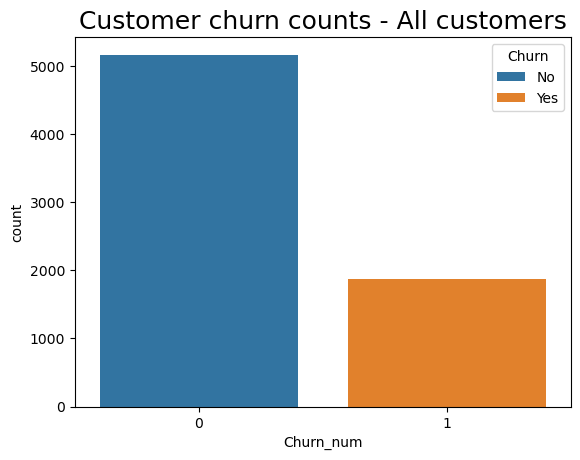

Churn
No     5163
Yes    1869
Name: count, dtype: int64


In [35]:
sns.countplot(data=churn_df, x='Churn_num', hue='Churn', stat="count")
plt.title('Customer churn counts - All customers', fontsize=18)
plt.show()
#print value counts
churn_counts = churn_df['Churn'].value_counts()
print(churn_counts)

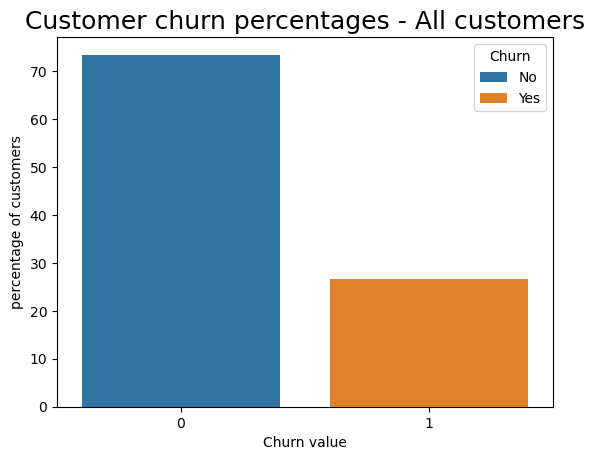

Churn Percentages
No: 73.42%
Yes: 26.58%


In [36]:
sns.countplot(data=churn_df, x='Churn_num', hue='Churn', stat="percent")
plt.title('Customer churn percentages - All customers', fontsize=18)
plt.xlabel("Churn value")
plt.ylabel("percentage of customers")
plt.show()

# Calculate the percentages separately
total_count = len(churn_df)
churn_counts = churn_df['Churn'].value_counts()
churn_percentages = (churn_counts / total_count) * 100

# Print the percentages
print("Churn Percentages")
for churn_value, percentage in churn_percentages.items():
    print(f"{churn_value}: {percentage:.2f}%")

In [37]:
#filter into a new dataframe with only phone service customers
phone_only_df = churn_df[(churn_df['PhoneService_num']==1) & (churn_df['InternetService_num']==0)]

In [38]:
phone_only_df.shape

(1520, 39)

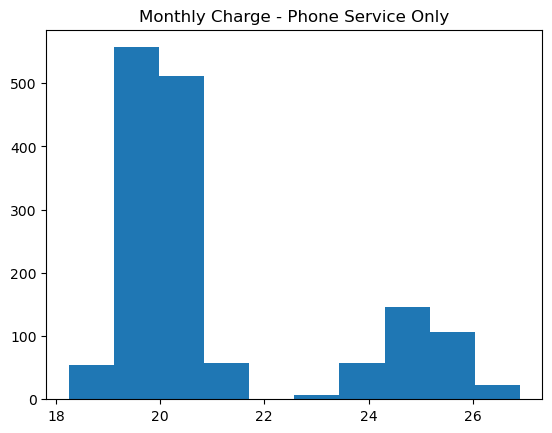

In [39]:
# take a look at the distribution for the monthly charges for phone service only customers
plt.hist(phone_only_df['MonthlyCharges'])
plt.title('Monthly Charge - Phone Service Only')
plt.show()

In [40]:
#Break down of churn percentages for Phone, Internet and those with both services

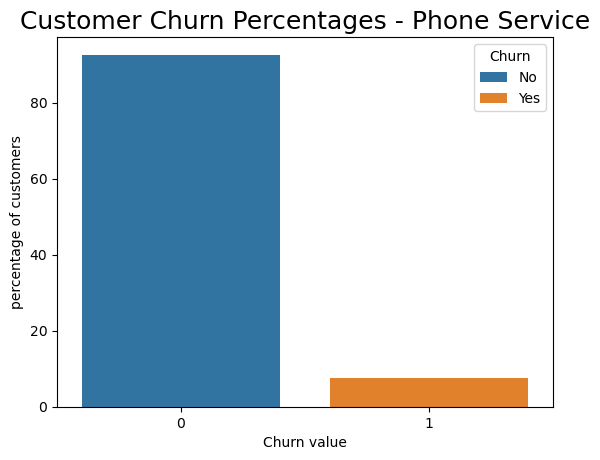

Churn Percentages - Phone Services
No: 92.57%
Yes: 7.43%


In [41]:
#phone service customers churn percentage
sns.countplot(data=phone_only_df, x='Churn_num', hue='Churn', stat="percent")
plt.title('Customer Churn Percentages - Phone Service', fontsize=18)
plt.xlabel("Churn value")
plt.ylabel("percentage of customers")
plt.show()

# Calculate the percentages separately
total_count_p = len(phone_only_df)
churn_counts_p = phone_only_df['Churn'].value_counts()
churn_percentages_p = (churn_counts_p / total_count_p) * 100

# Print the percentages
print("Churn Percentages - Phone Services")
for churn_value, percentage in churn_percentages_p.items():
    print(f"{churn_value}: {percentage:.2f}%")

In [42]:
phone_only_df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn_num,Partner_num,Dependents_num,PhoneService_num,MultipleLines_num,OnlineSecurity_num,...,TechSupport_num,StreamingTV_num,StreamingMovies_num,PaperlessBilling_num,InternetService_num,gender_num,Contract_num,PaymentMethod_num,Phone_Internet,Number_of_Services
count,1520.000000,1520.000000,1520.000000,1520.000000,1520.000000,1520.000000,1520.000000,1520.0,1520.000000,1520.0,...,1520.0,1520.0,1520.0,1520.000000,1520.0,1520.000000,1520.000000,1520.000000,1520.0,1520.000000
mean,0.034211,30.667763,21.076283,665.220329,0.074342,0.482237,0.419079,1.0,0.223684,0.0,...,0.0,0.0,0.0,0.292763,0.0,0.509211,1.071711,1.573684,1.0,1.223684
std,0.181829,24.328631,2.161599,555.158112,0.262413,0.499849,0.493571,0.0,0.416850,0.0,...,0.0,0.0,0.0,0.455180,0.0,0.500080,0.869793,0.917157,0.0,0.416850
min,0.000000,1.000000,18.250000,18.800000,0.000000,0.000000,0.000000,1.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,1.0,1.000000
25%,0.000000,8.000000,19.700000,159.875000,0.000000,0.000000,0.000000,1.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,1.000000,1.0,1.000000
50%,0.000000,25.000000,20.150000,523.675000,0.000000,0.000000,0.000000,1.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,1.000000,1.000000,1.000000,1.0,1.000000
75%,0.000000,53.000000,20.900000,1110.050000,0.000000,1.000000,1.000000,1.0,0.000000,0.0,...,0.0,0.0,0.0,1.000000,0.0,1.000000,2.000000,2.000000,1.0,1.000000
max,1.000000,72.000000,26.900000,2006.950000,1.000000,1.000000,1.000000,1.0,1.000000,0.0,...,0.0,0.0,0.0,1.000000,0.0,1.000000,2.000000,3.000000,1.0,2.000000


In [43]:
#filter into a new dataframe with only internet service customers
internet_only_df = churn_df[(churn_df['InternetService_num']==1) & (churn_df['PhoneService_num']==0)]

In [44]:
internet_only_df.shape

(680, 39)

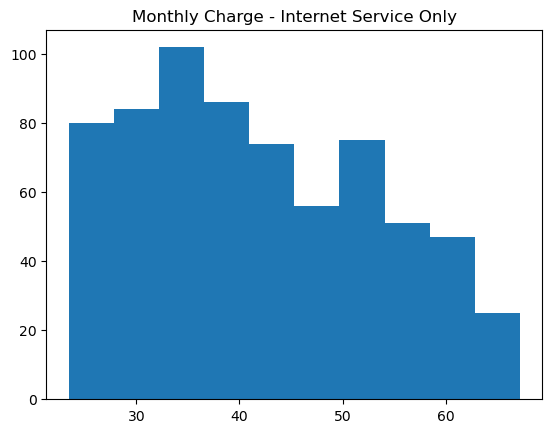

In [45]:
# take a look at the distribution for the monthly charges for Internet service only customers
plt.hist(internet_only_df['MonthlyCharges'])
plt.title('Monthly Charge - Internet Service Only')
plt.show()

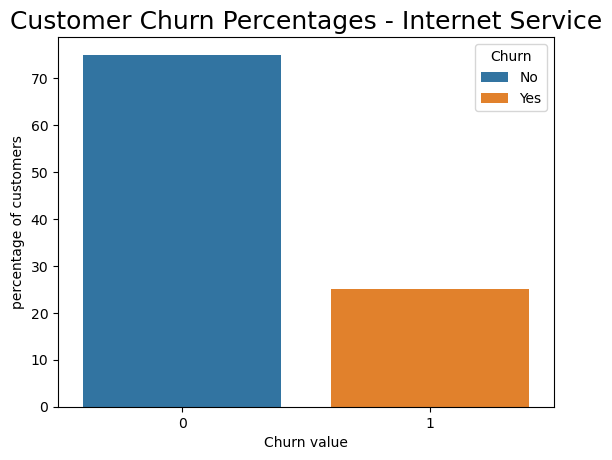

Churn Percentages - Internet Services
No: 75.00%
Yes: 25.00%


In [46]:
#internet service customers churn percentage
sns.countplot(data=internet_only_df, x='Churn_num', hue='Churn', stat="percent")
plt.title('Customer Churn Percentages - Internet Service', fontsize=18)
plt.xlabel("Churn value")
plt.ylabel("percentage of customers")
plt.show()

# Calculate the percentages separately
total_count_i = len(internet_only_df)
churn_counts_i = internet_only_df['Churn'].value_counts()
churn_percentages_i = (churn_counts_i / total_count_i) * 100

# Print the percentages
print("Churn Percentages - Internet Services")
for churn_value, percentage in churn_percentages_i.items():
    print(f"{churn_value}: {percentage:.2f}%")

In [47]:
internet_only_df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn_num,Partner_num,Dependents_num,PhoneService_num,MultipleLines_num,OnlineSecurity_num,...,TechSupport_num,StreamingTV_num,StreamingMovies_num,PaperlessBilling_num,InternetService_num,gender_num,Contract_num,PaymentMethod_num,Phone_Internet,Number_of_Services
count,680.000000,680.000000,680.00000,680.000000,680.000000,680.000000,680.000000,680.0,680.0,680.000000,...,680.000000,680.000000,680.000000,680.000000,680.0,680.000000,680.000000,680.000000,680.0,680.000000
mean,0.152941,31.830882,41.99250,1500.433750,0.250000,0.454412,0.300000,0.0,0.0,0.413235,...,0.422059,0.416176,0.438235,0.567647,1.0,0.516176,0.680882,1.326471,0.0,3.555882
std,0.360196,24.207484,11.41653,1341.202783,0.433331,0.498284,0.458595,0.0,0.0,0.492777,...,0.494251,0.493286,0.496536,0.495767,0.0,0.500106,0.828213,1.156096,0.0,1.621776
min,0.000000,1.000000,23.45000,23.450000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.0,1.000000
25%,0.000000,8.000000,33.60000,298.962500,0.000000,0.000000,0.000000,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.0,2.000000
50%,0.000000,29.000000,40.55000,1153.800000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,1.000000,1.0,1.000000,0.000000,1.000000,0.0,4.000000
75%,0.000000,53.000000,50.66250,2465.175000,0.250000,1.000000,1.000000,0.0,0.0,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,2.000000,0.0,5.000000
max,1.000000,72.000000,67.20000,4919.700000,1.000000,1.000000,1.000000,0.0,0.0,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,2.000000,3.000000,0.0,7.000000


In [48]:
#filter into a new dataframe with only phone and internet (bundle)customers
bundle_only_df = churn_df[(churn_df['InternetService_num']==1) & (churn_df['PhoneService_num']==1)]

In [49]:
bundle_only_df.shape

(1736, 39)

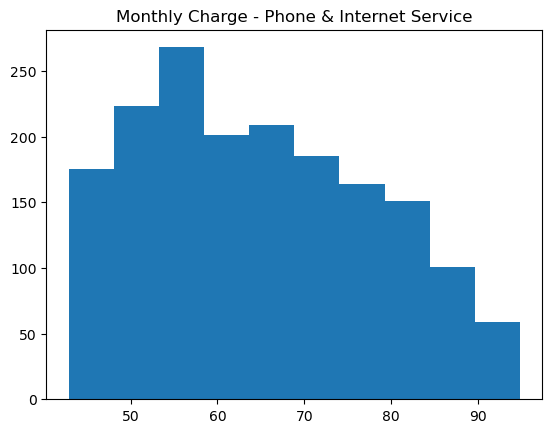

In [50]:
# take a look at the distribution for the monthly charges for phone & internet bundled services  customers
plt.hist(bundle_only_df['MonthlyCharges'])
plt.title('Monthly Charge - Phone & Internet Service')
plt.show()

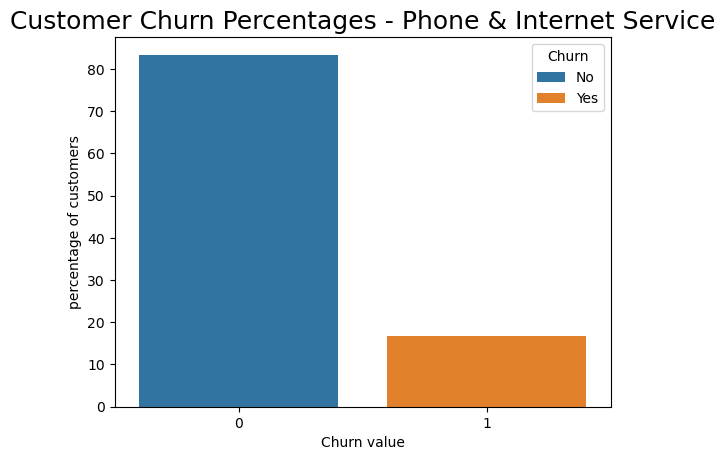

In [51]:
#phone and internet bundle service customers churn percentage
sns.countplot(data=bundle_only_df, x='Churn_num', hue='Churn', stat="percent")
plt.title('Customer Churn Percentages - Phone & Internet Service', fontsize=18)
plt.xlabel("Churn value")
plt.ylabel("percentage of customers")
plt.show()

In [52]:
# Calculate the percentages separately
total_count_b = len(bundle_only_df)
churn_counts_b = bundle_only_df['Churn'].value_counts()
churn_percentages_b = (churn_counts_b / total_count_b) * 100

# Print the percentages
print("Churn Percentages - Phone / Internet Bundled Services")
for churn_value, percentage in churn_percentages_b.items():
    print(f"{churn_value}: {percentage:.2f}%")

Churn Percentages - Phone / Internet Bundled Services
No: 83.35%
Yes: 16.65%


In [53]:
bundle_only_df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn_num,Partner_num,Dependents_num,PhoneService_num,MultipleLines_num,OnlineSecurity_num,...,TechSupport_num,StreamingTV_num,StreamingMovies_num,PaperlessBilling_num,InternetService_num,gender_num,Contract_num,PaymentMethod_num,Phone_Internet,Number_of_Services
count,1736.000000,1736.000000,1736.000000,1736.000000,1736.000000,1736.000000,1736.000000,1736.0,1736.000000,1736.000000,...,1736.000000,1736.000000,1736.000000,1736.000000,1736.0,1736.000000,1736.000000,1736.000000,1736.0,1736.000000
mean,0.089286,33.304147,64.392713,2362.393952,0.166475,0.492512,0.343318,1.0,0.396889,0.515553,...,0.510945,0.385945,0.392857,0.542627,1.0,0.507488,0.779378,1.506912,1.0,5.097350
std,0.285238,25.013027,13.265463,2001.827123,0.372614,0.500088,0.474953,0.0,0.489394,0.499902,...,0.500024,0.486958,0.488526,0.498323,0.0,0.500088,0.840784,1.115238,0.0,1.980968
min,0.000000,1.000000,42.900000,42.900000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.0,2.000000
25%,0.000000,9.000000,54.150000,518.212500,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,1.000000,1.0,3.000000
50%,0.000000,30.000000,63.700000,1914.075000,0.000000,0.000000,0.000000,1.0,0.000000,1.000000,...,1.000000,0.000000,0.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.0,5.000000
75%,0.000000,57.000000,74.812500,3973.112500,0.000000,1.000000,1.000000,1.0,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,2.000000,3.000000,1.0,7.000000
max,1.000000,72.000000,94.800000,6859.050000,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,2.000000,3.000000,1.0,9.000000


In [54]:
#filter into a new dataframe with customers with multiple services (phone, internet, streaming, multiple phone lines, etc)
multiple_only_df = churn_df[churn_df['Number_of_Services']>1]

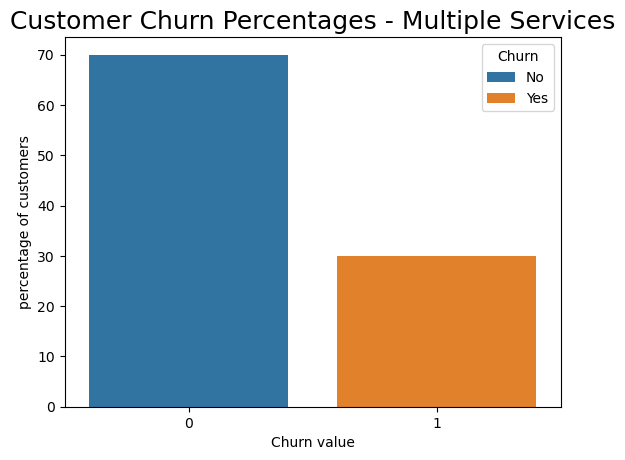

Churn Percentages - Multiple Services
No: 70.01%
Yes: 29.99%


In [55]:
#Multiple services -  customers churn percentage
sns.countplot(data=multiple_only_df, x='Churn_num', hue='Churn', stat="percent")
plt.title('Customer Churn Percentages - Multiple Services', fontsize=18)
plt.xlabel("Churn value")
plt.ylabel("percentage of customers")
plt.show()

# Calculate the percentages separately
total_count_m = len(multiple_only_df)
churn_counts_m = multiple_only_df['Churn'].value_counts()
churn_percentages_m = (churn_counts_m / total_count_m) * 100

# Print the percentages
print("Churn Percentages - Multiple Services")
for churn_value, percentage in churn_percentages_m.items():
    print(f"{churn_value}: {percentage:.2f}%")

In [56]:
multiple_only_df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn_num,Partner_num,Dependents_num,PhoneService_num,MultipleLines_num,OnlineSecurity_num,...,TechSupport_num,StreamingTV_num,StreamingMovies_num,PaperlessBilling_num,InternetService_num,gender_num,Contract_num,PaymentMethod_num,Phone_Internet,Number_of_Services
count,5772.000000,5772.000000,5772.000000,5772.000000,5772.000000,5772.000000,5772.000000,5772.000000,5772.000000,5772.000000,...,5772.000000,5772.000000,5772.000000,5772.000000,5772.000000,5772.000000,5772.000000,5772.000000,5772.000000,5772.000000
mean,0.189882,34.074324,74.518642,2672.933862,0.299896,0.495669,0.279106,0.896050,0.514033,0.349099,...,0.353430,0.468295,0.473146,0.658177,1.477477,0.502079,0.646570,1.279453,0.896050,5.370582
std,0.392242,24.656746,23.979212,2316.986498,0.458252,0.500025,0.448599,0.305222,0.499846,0.476727,...,0.478076,0.499037,0.499322,0.474362,0.606108,0.500039,0.820273,1.191741,0.305222,2.121027
min,0.000000,1.000000,22.950000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
25%,0.000000,10.000000,55.800000,638.562500,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,4.000000
50%,0.000000,32.000000,78.450000,1956.750000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,1.000000,5.000000
75%,0.000000,58.000000,94.000000,4390.500000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,7.000000
max,1.000000,72.000000,118.750000,8684.800000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,3.000000,1.000000,10.000000


After this initial first pass of the data, we can drop the customer ID (since it adds no value). I would like to keep gender for now for subsequent correlational analysis. We've also addressed records with missing values.

In [57]:
churn_df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn', 'Churn_num',
       'Partner_num', 'Dependents_num', 'PhoneService_num',
       'MultipleLines_num', 'OnlineSecurity_num', 'OnlineBackup_num',
       'DeviceProtection_num', 'TechSupport_num', 'StreamingTV_num',
       'StreamingMovies_num', 'PaperlessBilling_num', 'InternetService_num',
       'gender_num', 'Contract_num', 'PaymentMethod_num', 'Phone_Internet',
       'Number_of_Services'],
      dtype='object')

In [58]:
drop_columns = ['customerID']
churn_df_lean = churn_df.drop(columns =drop_columns )
print(churn_df_lean.shape)
churn_df_lean.head()

(7032, 38)


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport_num,StreamingTV_num,StreamingMovies_num,PaperlessBilling_num,InternetService_num,gender_num,Contract_num,PaymentMethod_num,Phone_Internet,Number_of_Services
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,0,0,0,1,1,0,0,0,0.0,2
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,0,0,0,0,1,1,1,1,1.0,4
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,0,0,0,1,1,1,0,1,1.0,4
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,...,1,0,0,0,1,1,1,2,0.0,4
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,...,0,0,0,1,2,0,0,0,1.0,3


In [59]:
#export scrubbed dataframe to csv
churn_df_lean.to_csv('../data_files/interim/scrubbed_Telco_Customer_Churn.csv', index=False)